<a href="https://colab.research.google.com/github/Laaliji/Colon-Cancer-Gene-Expression-Data-Classification-Analysis/blob/main/Colon_Cancer_Gene_Expression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Colon Cancer Gene Expression Activity**

Colon cancer remains a major global health challenge, requiring precise diagnostic tools. Gene expression profiling, combined with machine learning, enables the identification of cancer biomarkers. This project analyzes the "Gene Expression of Colon Cancer" dataset (60 genes) to:
1. Compare five models—logistic regression, SVM, k-NN, decision tree, and random forest—for classification.
2. Identify influential genes based on each model’s mechanism (e.g., coefficients, feature importance).
3. Conduct a comparative analysis to determine the best prediction for a new patient.

Results will support an article for Nordic Machine Intelligence (NMI) journal.

*   **Supervision:** Dr. O. BANOUAR, Faculty of Sciences and Techniques, Cadi Ayyad University, Marrakech.
*   **Realized by:** Zakariae LAALIJI.



## **Libraries and Configurations**

This section imports the necessary Python libraries and configures the environment for analyzing the "Gene Expression of Colon Cancer" dataset. Libraries such as pandas, scikit-learn, and matplotlib are used for data processing, machine learning, and visualization, enabling model training, gene importance analysis, and comparative evaluation. Configurations ensure reproducibility and consistency throughout the analysis.

In [2]:
from google.colab import drive # Import the necessary library for Google Drive integration
drive.mount('/content/drive') # Mount your Google Drive to the '/content/drive' directory

Mounted at /content/drive


In [3]:
import os #for operating system related tasks

# Specifying the path
datasets_folder_path = '/content/drive/My Drive/Datasets_For_Research'

# Printing the contents of the 'Datasets_For_Research' folder
print(os.listdir(datasets_folder_path))  # to list files and directories

['colon_cancer.csv', 'missing_values_heatmap.png', 'class_distribution.png']


In [5]:
import pandas as pd # For data manipulation and analysis using DataFrames
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler # For feature scaling (standardization)
from sklearn.linear_model import LogisticRegression # For logistic regression model
from sklearn.neighbors import KNeighborsClassifier # For k-nearest neighbors model
from sklearn.inspection import DecisionBoundaryDisplay # For visualizing decision boundaries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # For model evaluation metrics
from sklearn.model_selection import cross_val_score # For cross-validation
from sklearn.svm import SVC # For Support Vector Machine model
import seaborn as sns # For data visualization
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For plotting graphs

## **Data preparation**

This section prepares the "Gene Expression of Colon Cancer" dataset for analysis. Tasks include loading the dataset, handling missing values, standardizing the 60 gene expression features, and splitting the data into training and test sets. These steps ensure the data is clean, consistent, and ready for training machine learning models and evaluating gene importance.

### **Exploratory Data Analysis**

This subsection examines the "Gene Expression of Colon Cancer" dataset to understand its characteristics, including class distribution and gene expression feature distributions. Visualizations and summary statistics help identify patterns, imbalances, or anomalies, informing subsequent preprocessing and model selection.

**Why EDA?** Exploratory Data Analysis (EDA) helps understand the dataset’s structure, distributions, and patterns (e.g., gene expression ranges, class distribution). It guides preprocessing and model selection by revealing issues like outliers or imbalances.

In [6]:
# Specify the dataset path
file_path = '/content/drive/My Drive/Datasets_For_Research/colon_cancer.csv'

# Load the dataset
data = pd.read_csv(file_path, sep=';')

# Display basic information
print("Dataset Shape:", data.shape)
print("\nColumn Names:", data.columns.tolist())
print("\nData Types:\n", data.dtypes)

# Display first few rows
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

Dataset Shape: (804, 62)

Column Names: ['id_sample', 'ADH1C', 'DHRS11', 'UGP2', 'SLC7A5', 'CTSS', 'DAO', 'NIBAN1', 'PRUNE2', 'FOXF2', 'TENT5C', 'KLF10', 'FABP1', 'RPSAP19', 'NCAPH', 'TPM1', 'PLA2G12B', 'PLAAT4', 'IGLV8-61', 'GSS', 'L1TD1', 'RNF186', 'HES2', 'MXRA8', 'SOX18', 'NDFIP2', 'SIAE', 'NEURL1B', 'DDIT4', 'TRPM4', 'RETREG1', 'OTULINL', 'CPVL', 'SAMD9', 'ANKRD40CL', 'EPN3', 'CRYBG2', 'GIPC2', 'P3H2', 'STEAP3', 'THNSL2', 'TRAPPC14', 'RHBDL2', 'RPP25', 'SEMA4C', 'RNF43', 'EPS8L1', 'TOR4A', 'PAQR5', 'SIDT1', 'ESRP1', 'SYTL2', 'BSPRY', 'CDHR2', 'ERRFI1', 'CLIC5', 'PLLP', 'GAL', 'CRYL1', 'YBX2', 'ANGPTL4', 'tissue_status']

Data Types:
 id_sample         object
ADH1C            float64
DHRS11           float64
UGP2             float64
SLC7A5           float64
                  ...   
GAL              float64
CRYL1            float64
YBX2             float64
ANGPTL4          float64
tissue_status     object
Length: 62, dtype: object

First 5 Rows of the Dataset:
         id_sample    

The dataset contains 804 samples and 62 columns: 1 sample ID (id_sample), 60 gene expression features (e.g., ADH1C, SLC7A5, RNF43), and 1 target column (tissue_status, binary: normal/cancer). Gene expression values are float64, while id_sample and tissue_status are object. The dataset is sizable, supporting robust model training, but the target distribution (not fully shown) needs checking for class balance. The gene expression ranges (e.g., SLC7A5: 2.36–7.06 in the first 5 rows) suggest standardization is required for scale-sensitive models like SVM and k-NN.

Missing Values Count:
 id_sample        0
ADH1C            0
DHRS11           0
UGP2             0
SLC7A5           0
                ..
GAL              0
CRYL1            0
YBX2             0
ANGPTL4          0
tissue_status    0
Length: 62, dtype: int64

Missing Values Percentage:
 id_sample        0.0
ADH1C            0.0
DHRS11           0.0
UGP2             0.0
SLC7A5           0.0
                ... 
GAL              0.0
CRYL1            0.0
YBX2             0.0
ANGPTL4          0.0
tissue_status    0.0
Length: 62, dtype: float64

No missing values found in the dataset.


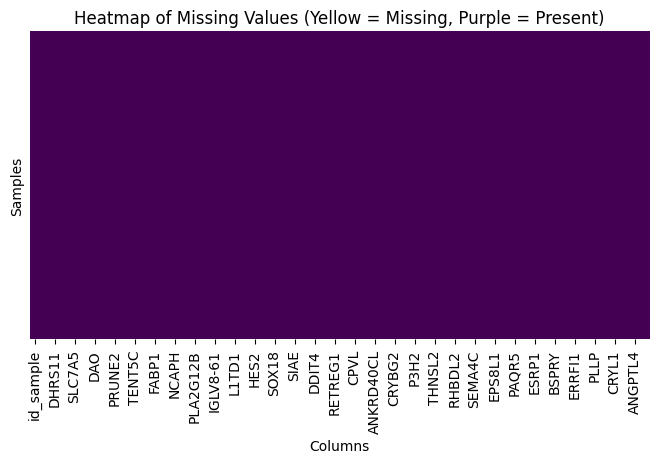

In [7]:
# Check for missing values
print("Missing Values Count:\n", data.isnull().sum())
print("\nMissing Values Percentage:\n", (data.isnull().sum() / len(data) * 100).round(2))

# Analyze missing values
missing_cols = data.columns[data.isnull().any()].tolist()
if missing_cols:
    print("\nColumns with Missing Values:", missing_cols)
    print("Number of Columns with Missing Values:", len(missing_cols))
    print("Total Missing Values:", data.isnull().sum().sum())
else:
    print("\nNo missing values found in the dataset.")

# Visualize missing values with a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values (Yellow = Missing, Purple = Present)")
plt.xlabel("Columns")
plt.ylabel("Samples")
plt.savefig('/content/drive/My Drive/Datasets_For_Research/missing_values_heatmap.png')
plt.show()


No missing values are present in the dataset (804 samples, 62 columns). This eliminates imputation needs, ensuring reliable data for model training and gene importance analysis.

**Why Check Missing Values?** Checking missing values ensures data completeness. Missing data can bias models, so identifying and handling them (e.g., imputation) guarantees reliable training and analysis.

Class Distribution:
tissue_status
normal     402
tumoral    402
Name: count, dtype: int64


<ipython-input-8-1b0b5053b61f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="tissue_status", data=data, palette='viridis')


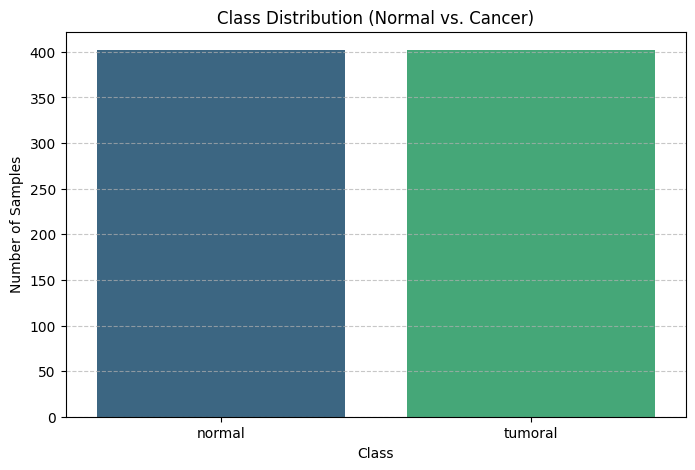


Class Percentage:
tissue_status
normal     50.0
tumoral    50.0
Name: proportion, dtype: float64


In [8]:
# Class distribution count
print("Class Distribution:")
print(data["tissue_status"].value_counts())

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x="tissue_status", data=data, palette='viridis')
plt.title("Class Distribution (Normal vs. Cancer)")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('/content/drive/My Drive/Datasets_For_Research/class_distribution.png')
plt.show()

# Class percentage
print("\nClass Percentage:")
print(data["tissue_status"].value_counts(normalize=True) * 100)

The dataset has a perfectly balanced class distribution, with 402 normal and 402 tumoral samples (50% each). This balance supports robust model training without requiring resampling techniques, ensuring fair evaluation of the five machine learning models.

**Why Check Class Equality?** Checking if classes are equal (e.g., normal vs. tumoral) assesses balance. Balanced classes ensure fair model training, while imbalance may require techniques like oversampling to prevent biased predictions.

In [12]:
# Descriptive Analysis
# Drop id_sample and tissue_status for statistics (not relevant)
features = data.drop(columns=["id_sample", "tissue_status"])

# Descriptive statistics
print("Descriptive Statistics of Gene Expression Features (Before Standardization):")
print(features.describe())


Descriptive Statistics of Gene Expression Features (Before Standardization):
            ADH1C      DHRS11        UGP2      SLC7A5        CTSS         DAO  \
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000   
mean     5.588943    4.354817    5.557694    4.513570    6.717535    7.218184   
std      2.889901    1.431179    1.150565    1.614450    1.077821    1.411969   
min      0.610504    1.427079    2.027201    1.685024    3.668691    1.164886   
25%      3.174250    3.118844    4.611060    3.030022    6.065937    6.241714   
50%      5.467024    4.125990    5.412204    4.382953    6.762908    7.578782   
75%      8.444756    5.696566    6.556969    5.918848    7.485487    8.263561   
max     10.263846    7.022241    7.571114    8.059430    8.990703   10.079135   

           NIBAN1      PRUNE2       FOXF2      TENT5C  ...       SYTL2  \
count  804.000000  804.000000  804.000000  804.000000  ...  804.000000   
mean     2.737937    2.806573    3.064394    

Descriptive analysis of the 60 gene expression features shows diverse ranges (e.g., SLC7A5: 1.69–8.06, DAO: 1.16–10.08) and high variability (e.g., ADH1C mean: 5.59, std: 2.89; SLC7A5 std: 1.61), **highlighting the need for standardization to ensure scale-sensitive models (SVM, k-NN) perform effectively.** It reveals distribution patterns, detects potential outliers, and informs feature selection by identifying variable genes, supporting robust model training and interpretation.

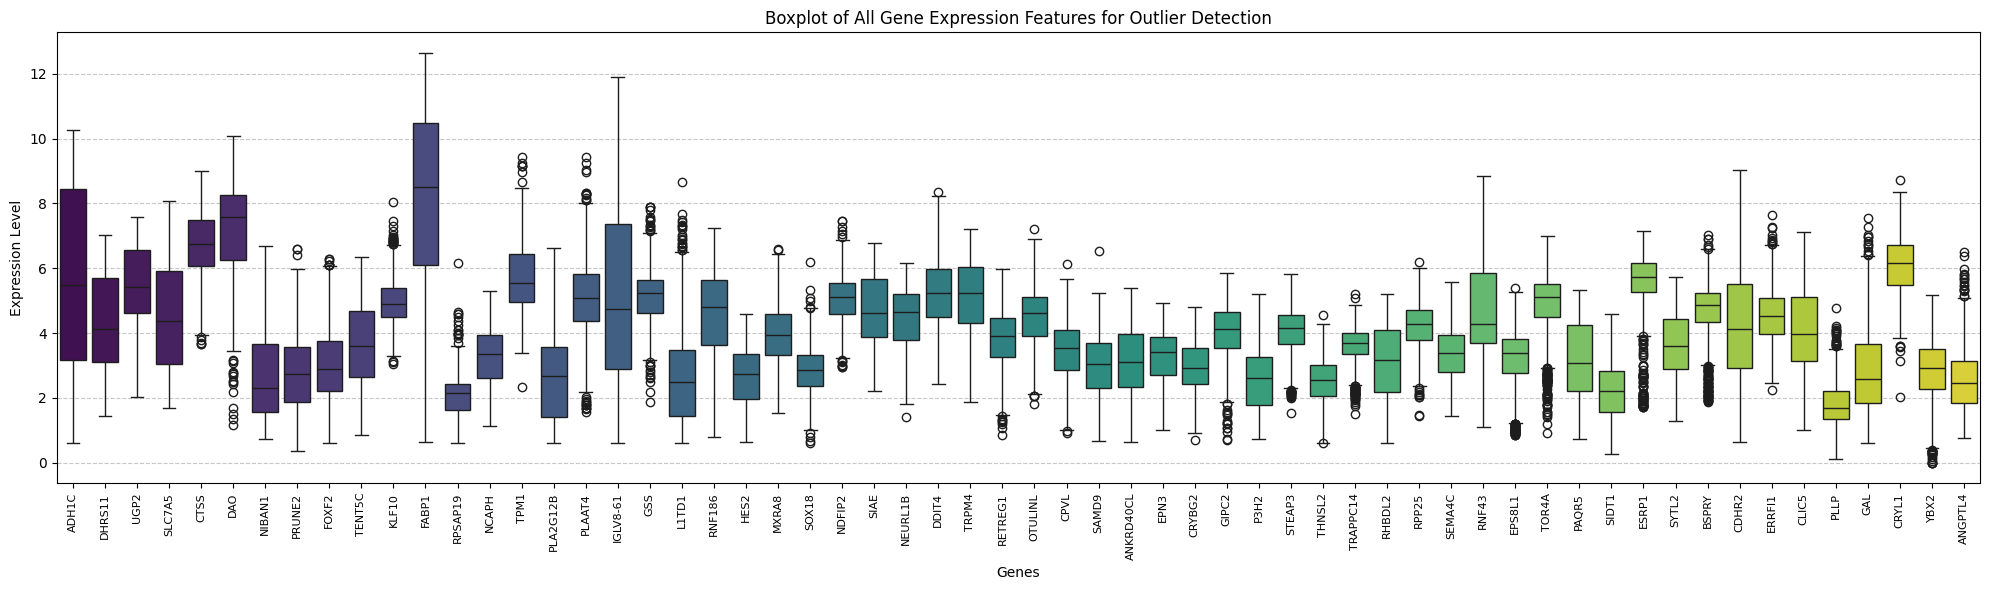

In [13]:
# Select gene expression features (exclude id_sample and tissue_status)
features = data.drop(columns=["id_sample", "tissue_status"])

# Boxplot for all 60 genes
plt.figure(figsize=(20, 6))
sns.boxplot(data=features, palette='viridis')
plt.title("Boxplot of All Gene Expression Features for Outlier Detection")
plt.xlabel("Genes")
plt.ylabel("Expression Level")
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The boxplot of all 60 gene expression features reveals varied distributions, with several genes (e.g., early ones like ADH1C, DHRS11) showing significant outliers beyond the whiskers (>1.5 IQR), indicating extreme expression values. Later genes (e.g., SYTL2, ANGPTL4) have fewer outliers, suggesting more consistent expression. These outliers may impact model performance, potentially requiring preprocessing like clipping or robust scaling.

In [14]:
# Function to count outliers using IQR method
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)].count()
    return outliers

# Calculate outliers for each gene
outlier_counts = features.apply(count_outliers)

# Display results
print("Number of Outliers per Gene:")
print(outlier_counts)

Number of Outliers per Gene:
ADH1C         0
DHRS11        0
UGP2          0
SLC7A5        0
CTSS          5
DAO          15
NIBAN1        0
PRUNE2        3
FOXF2         7
TENT5C        0
KLF10        23
FABP1         0
RPSAP19      16
NCAPH         0
TPM1          8
PLA2G12B      0
PLAAT4       25
IGLV8-61      0
GSS          26
L1TD1        19
RNF186        0
HES2          0
MXRA8         2
SOX18        10
NDFIP2       13
SIAE          0
NEURL1B       1
DDIT4         1
TRPM4         0
RETREG1       8
OTULINL       5
CPVL          3
SAMD9         1
ANKRD40CL     0
EPN3          0
CRYBG2        1
GIPC2        16
P3H2          0
STEAP3       18
THNSL2        2
TRAPPC14     41
RHBDL2        0
RPP25        11
SEMA4C        0
RNF43         0
EPS8L1       41
TOR4A        76
PAQR5         0
SIDT1         0
ESRP1        73
SYTL2         0
BSPRY        68
CDHR2         0
ERRFI1       11
CLIC5         0
PLLP         19
GAL          12
CRYL1         7
YBX2         20
ANGPTL4      17
dtype: int6

Outlier counts vary across the 60 genes, with some showing significant outliers (e.g., TOR4A: 76, ESRP1: 73, BSPRY: 68, EPS8L1: 41) and others none (e.g., ADH1C, SLC7A5, RNF43). High outlier counts (e.g., 9% of samples for TOR4A) suggest potential preprocessing (clipping or robust scaling) to reduce their impact on model performance, while genes with fewer or no outliers can be modeled directly.

### **Data Splitting and Scaling**

In [15]:
# Prepare features (X) and target (y)
X = data.drop(columns=["id_sample", "tissue_status"])
y = data["tissue_status"]

# Split the dataset (80% train, 20% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for clarity
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display shapes and sample statistics
print("Training Set Shape:", X_train_scaled.shape)
print("Test Set Shape:", X_test_scaled.shape)
print("\nTraining Set Mean (After Scaling):\n", X_train_scaled.mean().round(2))
print("\nTraining Set Std (After Scaling):\n", X_train_scaled.std().round(2))

Training Set Shape: (643, 60)
Test Set Shape: (161, 60)

Training Set Mean (After Scaling):
 ADH1C        0.0
DHRS11       0.0
UGP2         0.0
SLC7A5       0.0
CTSS        -0.0
DAO         -0.0
NIBAN1       0.0
PRUNE2      -0.0
FOXF2        0.0
TENT5C      -0.0
KLF10        0.0
FABP1        0.0
RPSAP19     -0.0
NCAPH       -0.0
TPM1         0.0
PLA2G12B     0.0
PLAAT4      -0.0
IGLV8-61    -0.0
GSS          0.0
L1TD1       -0.0
RNF186      -0.0
HES2         0.0
MXRA8        0.0
SOX18        0.0
NDFIP2       0.0
SIAE         0.0
NEURL1B     -0.0
DDIT4        0.0
TRPM4        0.0
RETREG1     -0.0
OTULINL      0.0
CPVL         0.0
SAMD9       -0.0
ANKRD40CL    0.0
EPN3         0.0
CRYBG2       0.0
GIPC2        0.0
P3H2        -0.0
STEAP3       0.0
THNSL2       0.0
TRAPPC14    -0.0
RHBDL2      -0.0
RPP25       -0.0
SEMA4C      -0.0
RNF43       -0.0
EPS8L1      -0.0
TOR4A        0.0
PAQR5        0.0
SIDT1       -0.0
ESRP1       -0.0
SYTL2        0.0
BSPRY        0.0
CDHR2        0.0
ERRFI1

The dataset splits into 643 training and 161 test samples (80/20 ratio), preserving class balance. After scaling, training set features have means near 0 (e.g., SLC7A5: 0.0) and standard deviations of 1 (e.g., DAO: 1.0), confirming successful standardization for scale-sensitive models like SVM and k-NN.

In [16]:
# Descriptive statistics of scaled training set
print("Descriptive Statistics of Scaled Training Set (After Standardization):")
print(X_train_scaled.describe().round(2))

Descriptive Statistics of Scaled Training Set (After Standardization):
        ADH1C  DHRS11    UGP2  SLC7A5    CTSS     DAO  NIBAN1  PRUNE2   FOXF2  \
count  643.00  643.00  643.00  643.00  643.00  643.00  643.00  643.00  643.00   
mean     0.00    0.00    0.00    0.00   -0.00   -0.00    0.00   -0.00    0.00   
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -1.73   -2.07   -3.04   -1.74   -2.82   -4.36   -1.40   -1.98   -2.07   
25%     -0.82   -0.87   -0.82   -0.93   -0.58   -0.69   -0.81   -0.77   -0.73   
50%     -0.05   -0.16   -0.09   -0.10    0.06    0.27   -0.30   -0.06   -0.13   
75%      0.98    0.93    0.87    0.87    0.72    0.75    0.65    0.59    0.60   
max      1.64    1.88    1.74    2.20    2.11    2.06    2.73    3.01    2.66   

       TENT5C  ...   SYTL2   BSPRY   CDHR2  ERRFI1   CLIC5    PLLP     GAL  \
count  643.00  ...  643.00  643.00  643.00  643.00  643.00  643.00  643.00   
mean    -0.00  ...    0.00    0.00    0.00 

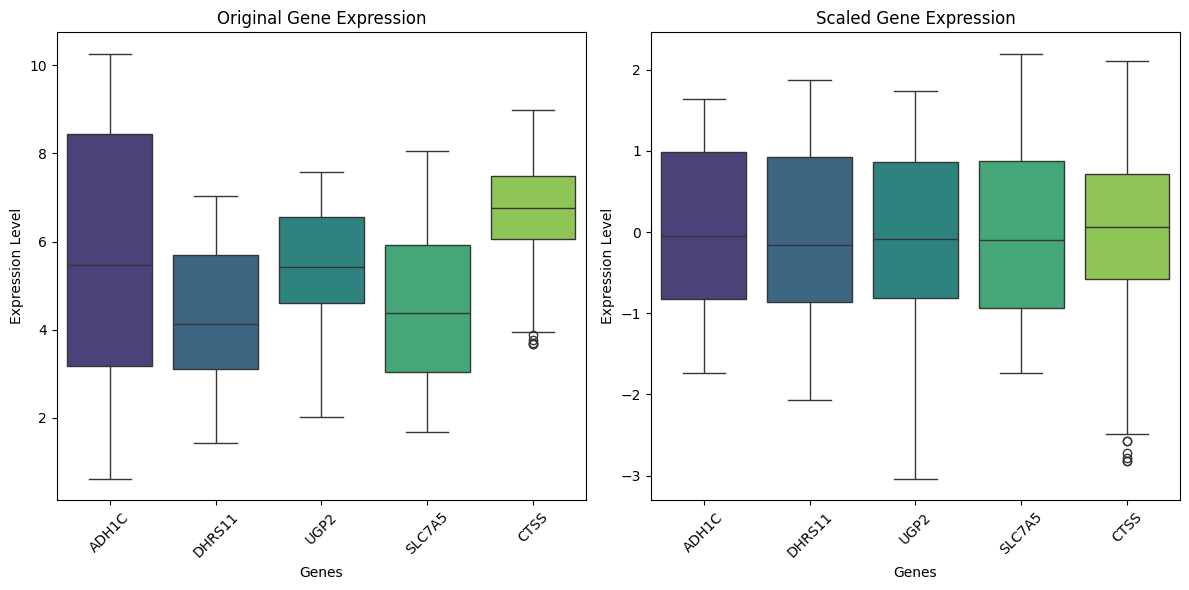

In [17]:
# Select original and scaled features
original_features = data.drop(columns=["id_sample", "tissue_status"])
scaled_features = X_train_scaled

# Select a subset of genes for clarity (e.g., first 5)
selected_genes = original_features.columns[:5].tolist()

# Create subplots
plt.figure(figsize=(12, 6))

# Boxplot for original data
plt.subplot(1, 2, 1)
sns.boxplot(data=original_features[selected_genes], palette='viridis')
plt.title("Original Gene Expression")
plt.xlabel("Genes")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)

# Boxplot for scaled data
plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_features[selected_genes], palette='viridis')
plt.title("Scaled Gene Expression")
plt.xlabel("Genes")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Reasons for Standardization Like This:**

1.   **Scale-Sensitive Models:** Algorithms like Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), and neural networks assume features are on the same scale. Without standardization, genes with larger ranges (e.g., DAO: 1.16–10.08) would dominate over those with smaller ranges (e.g., PLLP: 0.12–4.76), skewing distance-based calculations and weight assignments.
2.   **Improved Convergence:** Gradient-based optimization (e.g. logistic regression) converges faster when features are standardized. Unscaled data with high variance (e.g., ADH1C std: 2.89) can lead to slow or unstable learning.
3. **Outlier Handling:** Standardization reduces the impact of outliers by normalizing their relative position (e.g., an outlier in TOR4A becomes a z-score, typically within ±3). This helps models focus on patterns rather than extreme values, though robust scaling (e.g., RobustScaler) can be considered if outliers persist.

